# Filter & Faltungen (Convolutions)

In diesem Notebook schauen wir uns an, wie man mit **Filtern** (kleinen Matrizen) Bilder bearbeiten kann. Das ist genau die Art von Operation, die auch in **Convolutional Neural Networks (CNNs)** wie dem **U-Net** verwendet wird. Wie genau diese Netze arbeiten lernen wir im Rahmen des Workshops noch.

**Beispiele für Filter:**
- Weichzeichnen (Blur)
- Kanten erkennen (Edge Detection)
- Schärfen (Sharpen)

**Aufgabenideen:**
- Probiert eigene 3×3-Filter aus.
- Versucht, einen Filter zu bauen, der diagonale Kanten betont.

# 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

## Hilfsfunktion: einfache 2D-Faltung (ohne Padding)


In [34]:
def simple_convolution(gray_image, kernel):
    """
    Faltet ein Graustufenbild mit einem Kernel und verwendet Zero-Padding,
    sodass das Ausgabebild die gleiche Größe wie das Eingabebild hat.

    gray_image: 2D numpy array (Höhe x Breite)
    kernel: 2D numpy array (z.B. 3x3, 5x5)
    """
    kh, kw = kernel.shape
    ih, iw = gray_image.shape

    # Wir gehen davon aus, dass kh und kw ungerade sind:
    pad_h = kh // 2
    pad_w = kw // 2

    # Zero-Padding um das Bild herum
    padded = np.pad(
        gray_image,
        ((pad_h, pad_h), (pad_w, pad_w)),
        mode="constant",
        constant_values=0.0
    )

    # Ausgabe hat die gleiche Größe wie das Originalbild
    output = np.zeros((ih, iw), dtype=float)

    # Faltung
    for i in range(ih):
        for j in range(iw):
            patch = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(patch * kernel)

    return output


## 3. Bild laden und vorbereiten

Wir verwenden ein Graustufenbild (`camera`) als Beispiel.

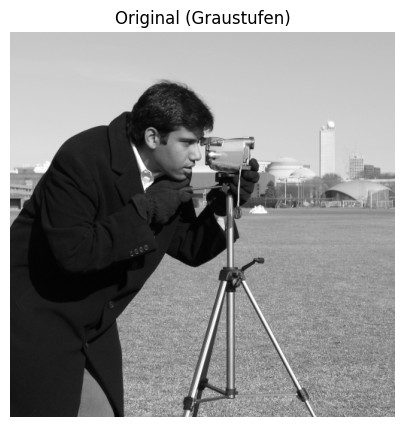

In [35]:
image_gray = data.camera().astype(float) / 255.0

plt.figure(figsize=(5, 5))
plt.imshow(image_gray, cmap='gray')
plt.title('Original (Graustufen)')
plt.axis('off')
plt.show()

## 4. Verschiedene Filter definieren

Wir definieren drei typische 3×3-Filter:

- **Blur** (Mittelwertfilter)
- **Edge (horizontal)** (Kantenfilter)
- **Sharpen** (Schärfungsfilter)

In [36]:
# Mittelwert ("Weichzeichnung", Blur)
kernel_blur = np.ones((3, 3)) / 9.0

# Kanten (Horizontal)
kernel_edge = np.array([[-1, -1, -1],
                        [ 0,  0,  0],
                        [ 1,  1,  1]])

# Schärfen
kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

kernels = {
    'Blur': kernel_blur,
    'Edge (horizontal)': kernel_edge,
    'Sharpen': kernel_sharpen
}

## 5. Filter anwenden und vergleichen

Wir wenden die Filter nacheinander auf das Bild an und vergleichen die Ergebnisse.

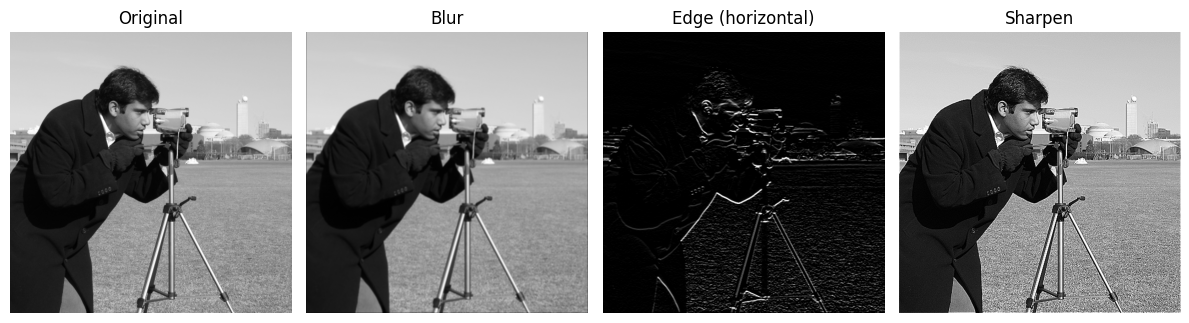

In [33]:
plt.figure(figsize=(3*(len(kernels)+1), 4))

plt.subplot(1, len(kernels)+1, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

for idx, (name, kernel) in enumerate(kernels.items(), start=2):
    filtered = simple_convolution(image_gray, kernel)

    # Für die Darstellung clippen
    filtered_show = np.clip(filtered, 0.0, 1.0)

    plt.subplot(1, len(kernels)+1, idx)
    plt.imshow(filtered_show, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()